***The Findings Below are mine and mine alone and in no way reflect the official views of anyone else.  If you care about this topic, consult a real expert, not someone doing something for a MOOC. Nothing below may be used or cited by anyone else without the express permission of the author***

# H1 HUMAN TRAFFICKING: Enforcement Gap in Statistics?

Well-meaning people can differ on whether or not an individual should be allowed to sell sex for money, but moral opprobrium towards trafficking persons against their will to participate in the sex trade is near-universal.  Human Trafficking is a complex problem and no casual study like this this can unequivocally.   Between 100,000 and 300,000 persons are vulnerable to human trafficking according to [educational materials](https://www.dhs.gov/sites/default/files/publications/blue-campaign/Blue%20Campaign%20-%20Human%20Trafficking%20101%20for%20School%20Administrators%20and%20Staff.pdf) prepared by the US Department of Homeland Security.  Seattle and San Francisco, as major US population centers almost certainly have victims in human trafficking in their jurisdiction.  Police statics from 2014 provide some evidence that the cities' enforcement strategies towards sex crimes hew to traditional anti-vice approaches rather than decriminalization approaches taken in Jurisdictions elsewhere.

In [20]:
%matplotlib inline
import pandas as pd
from bokeh.charts import Histogram
import matplotlib.pyplot as plt
from bokeh.charts import defaults, vplot, hplot, show, output_file

seattle = pd.read_csv('seattle_incidents_summer_2014.csv', parse_dates =[7,8,9])
sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv', parse_dates =[4])

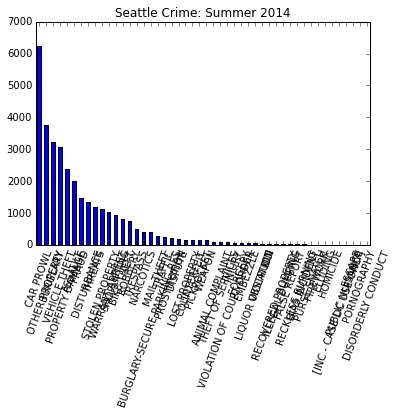

In [21]:
seattle['Summarized Offense Description'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=70)
plt.title('Seattle Crime: Summer 2014')


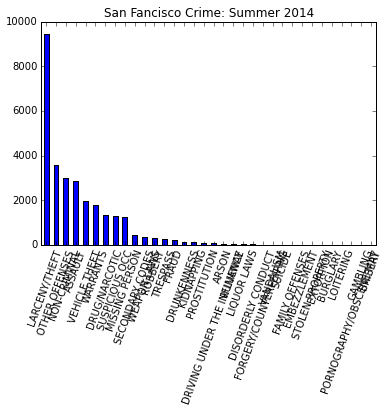

In [29]:
sf['Category'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 70)
plt.title('San Fancisco Crime: Summer 2014')

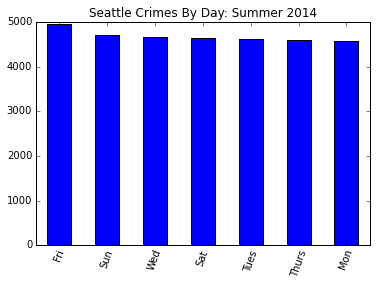

In [26]:
"""
Crimes by day of week
"""
def day_map(daynumber):
    if daynumber == 0:
        return "Mon"
    elif daynumber == 1:
        return "Tues"
    elif daynumber == 2:
        return "Wed"
    elif daynumber == 3:
        return "Thurs"
    elif daynumber == 4:
        return "Fri"
    elif daynumber == 5:
        return "Sat"
    elif daynumber == 6:
        return "Sun"
seattle['DayOfWeek'] = seattle['Occurred Date or Date Range Start'].dt.dayofweek
seattle['DayOfWeek'] = seattle.DayOfWeek.apply(lambda x: day_map(x))
##now plot
seattle['DayOfWeek'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=70)
plt.title('Seattle Crimes By Day: Summer 2014')


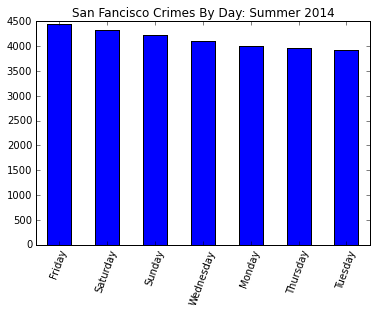

In [27]:
sf['DayOfWeek'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 70)
plt.title('San Fancisco Crimes By Day: Summer 2014')

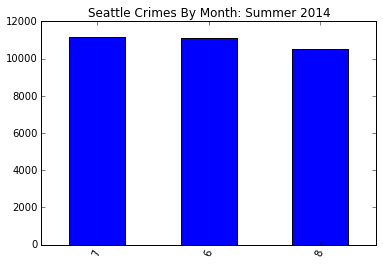

In [28]:
##Crimes by month
seattle['Month'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=70)
plt.title('Seattle Crimes By Month: Summer 2014')

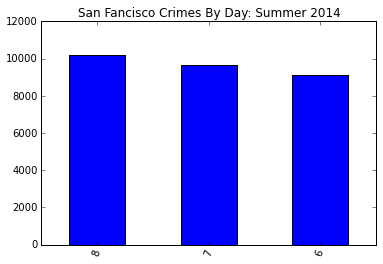

In [30]:
sf['Month'] = sf.Date.dt.month
sf['Month'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 70)
plt.title('San Fancisco Crimes By Day: Summer 2014')

In [60]:
"""
characterize crimes
"""
theft = ['THEFT', 'STOLEN', 'FRAUD', 'COUNTERFEIT', 'PICPOCKET', 'BURGLARY', \
'SNATCH', 'EMBEZZLE', 'PROPERTY', 'BURGLARY']
 
weapons = ['WEAPON', 'FIREARM', 'GUN', 'KNIFE']

threatBehavior =['PROWL','THREATS', 'DSPUTE',  'CONDUCT', 'TRESPASS', \
'BEHAVIOR', "SUSPICIOUS"]

traffic = ['TRAFFIC']

sexual = ['PROSTITUTION', 'PORNOGRAPHY', 'INDECENT', 'SEXUAL', 'RAPE']

transactions = ['WARRANT', 'ORDER', 'REPORT', 'BIAS', 'FIREWORK', \
'OBSTRUCT', 'NUISANCE', 'CONDUCT', 'CODE', 'PAROLE']

OFelonies =['DUI', 'HOMICIDE', 'IMPRISONMENT', 'SERIOUS',\
 'ASSAULT', 'ABUSE']
 
def to_type(x):
    if x == 1:
        return 'theft'
    elif x ==2:
        return 'weapons'
    elif x == 3:
        return 'threatening behavior'
    elif x == 4:
        return 'traffic infractions'
    elif x ==5:
        return 'sexual'
    elif x ==6:
        return 'police business [serving paper etc...]'
    elif x == 7:
        return 'major felonies'
    else:
        return "other"
 
seattle['theft']=seattle['Summarized Offense Description'].str.contains("|".join(theft))*1
seattle['weapons']=seattle['Summarized Offense Description'].str.contains("|".join(weapons))*2
seattle['threatBehavior']=seattle['Summarized Offense Description'].str.contains("|".join(threatBehavior))*3
seattle['traffic']=seattle['Summarized Offense Description'].str.contains("|".join(traffic))*4
seattle['sexual']=seattle['Summarized Offense Description'].str.contains("|".join(sexual))*5
seattle['transactions']=seattle['Summarized Offense Description'].str.contains("|".join(transactions))*6
seattle['MajorFelonies']=seattle['Summarized Offense Description'].str.contains("|".join(OFelonies))*7
seattle['sumofallfears'] = seattle['theft']+seattle['weapons']+seattle['threatBehavior']+seattle['traffic']+seattle['sexual']+seattle['transactions']+seattle['OFelonies']
seattle['Other'] = seattle.sumofallfears.apply(lambda x: 8 if x == 0 else  0)
seattle['BroadCrimeCat'] =seattle['sumofallfears'] = seattle['theft']+seattle['weapons']+seattle['threatBehavior']+seattle['traffic']+seattle['sexual']+seattle['transactions']+seattle['OFelonies']+seattle['Other']
seattle['BroadCrimeCat'] = seattle.BroadCrimeCat.apply(lambda x: to_type(x))

sf['theft'] = sf.Category.str.contains("|".join(theft))*1
sf['weapons'] = sf.Category.str.contains("|".join(weapons))*2
sf['threatBehavior'] = sf.Category.str.contains("|".join(threatBehavior))*3
sf['traffic'] = sf.Category.str.contains("|".join(traffic))*4
sf['sexual'] = sf.Category.str.contains("|".join(sexual))*5
sf['transactions'] = sf.Category.str.contains("|".join(transactions))*6
sf['MajorFelonies'] = sf.Category.str.contains("|".join(OFelonies))*7

sf['sumofallfears'] = sf['theft']+sf['weapons']+sf['threatBehavior']+sf['traffic']+sf['sexual']+sf['transactions']+sf['MajorFelonies']
sf['Other'] =sf.sumofallfears.apply(lambda x: 8 if x == 0 else  0)
sf['BroadCrimeCat'] = sf['theft']+sf['weapons']+sf['threatBehavior']+sf['traffic']+sf['sexual']+sf['transactions']+sf['MajorFelonies']+sf['Other']
sf['BroadCrimeCat'] =sf['BroadCrimeCat'].apply(lambda x: to_type(x))


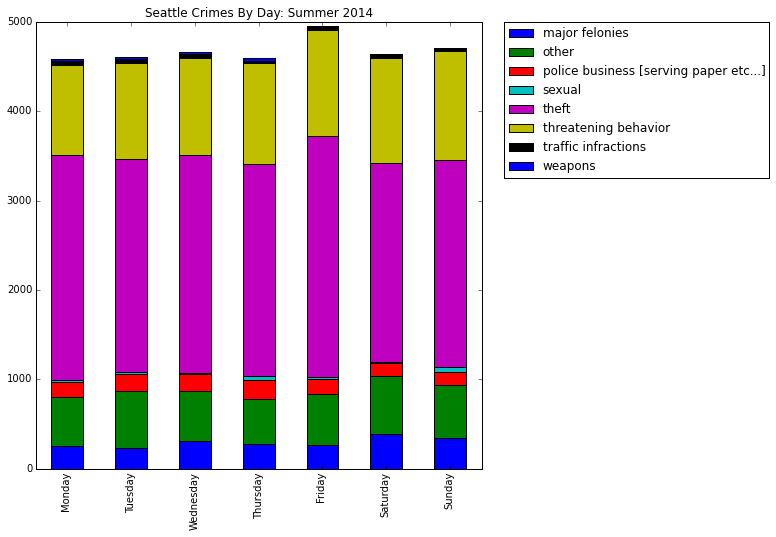

In [74]:
fig = plt.figure(figsize=(10,10))
ax = seattle.groupby(seattle['Occurred Date or Date Range Start'].dt.dayofweek)\
['BroadCrimeCat'].value_counts().unstack(1).plot(kind='bar', stacked=True, figsize=(8,8))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', "Friday", "Saturday", "Sunday"])
plt.xticks(rotation = 70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Seattle Crimes By Day: Summer 2014')

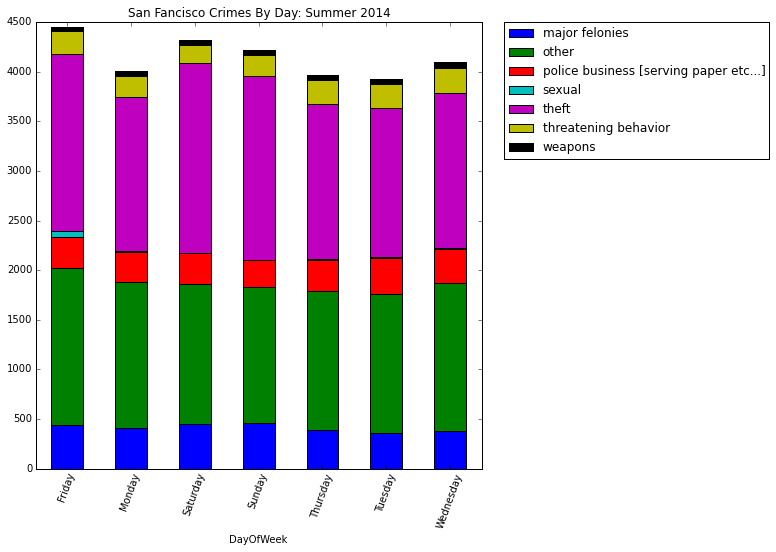

In [81]:
fig = plt.figure(figsize=(10,10))
ax = sf.groupby(sf['DayOfWeek'])['BroadCrimeCat'].value_counts().unstack(1).plot(kind='bar', stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 70)
plt.title('San Fancisco Crimes By Day: Summer 2014')

In [76]:
focus = sf[sf.sexual ==5]
all = sf.shape[0]
scb = focus.shape[0]
print "%s of the %s cases fall into the sexual crimes bin"%(scb, all)

113 of the 28993 cases fall into the sexual crimes bin


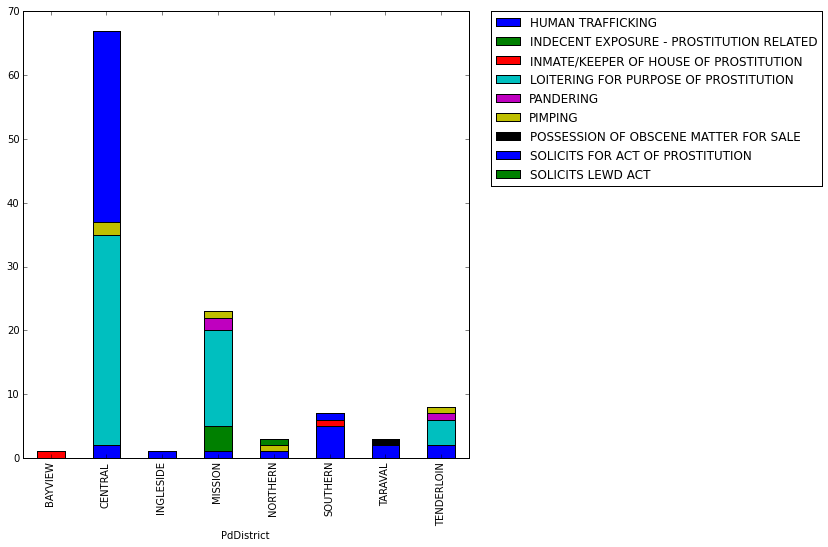

In [93]:
fig = plt.figure(figsize=(10,10))
ax = focus.groupby(sf['PdDistrict'])['Descript'].value_counts().unstack(1).plot(kind='bar', stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

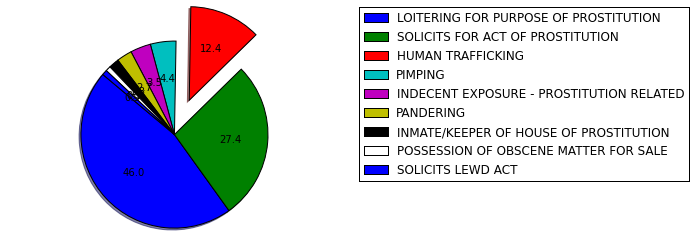

In [111]:
proportion = focus.Descript.value_counts()
values = proportion.values
labels = proportion.keys()
explode = (0, 0, 0.4, 0, 0,0,0,0,0)  # explode 3rd slice
# Plot
plt.pie(values, shadow=True, startangle=140, autopct='%.1f', explode=explode)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = labels)
plt.axis('equal')
plt.show()

In [113]:
focus2 = seattle[seattle.sexual ==5]
all = seattle.shape[0]
seabb = focus.shape[0]
print "%s of the %s cases fall into the sexual crimes bin"%(scb, all)

113 of the 32779 cases fall into the sexual crimes bin
